In [1]:
import healpy as hp
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Map from [CMB lensing and ISW cross-correlation with Legacy Survey](https://gitlab.com/qianjunhang/desi-legacy-survey-cross-correlations):

In [2]:
map_old = hp.read_map('Legacy_footprint_completeness_mask_128.fits')

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [3]:
alm = hp.map2alm(map_old)

In [4]:
nside=128
map_new = hp.alm2map(alm, nside=nside,fwhm=0.1)

map_new[map_new >= 0.1] = 1
map_new[map_new != 1] = 0

Sigma is 145.987664 arcmin (0.042466 rad) 
-> fwhm is 343.774677 arcmin


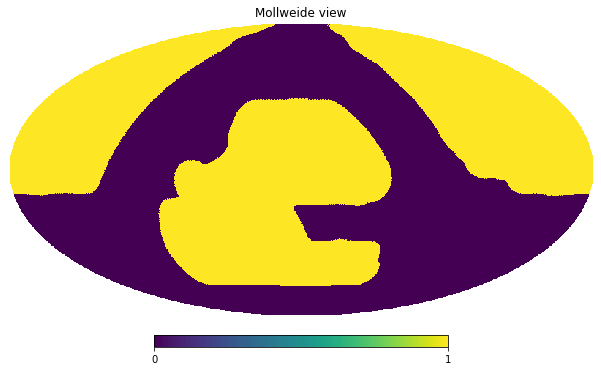

In [5]:
hp.mollview(map_new)

In [6]:
from joblib import Parallel, delayed

In [7]:
def trans_pixel(pix):
    coords = hp.pixelfunc.pix2ang(nside, pix, False, False)
    if sum(map_new[hp.pixelfunc.get_all_neighbours(nside, coords[0], coords[1], False, False)])==0:
        return 1
    else:
        return 0

In [8]:
%%time
pixel = np.array(Parallel(n_jobs=25)(delayed(trans_pixel)(i) \
                                          for i in range(len(map_new))))

CPU times: user 9.65 s, sys: 789 ms, total: 10.4 s
Wall time: 11.3 s


In [9]:
Map = np.array(pixel-map_new)

In [10]:
Map[Map == 0] = 200
Map[Map != 200] = 0
Map[Map == 200] = 1

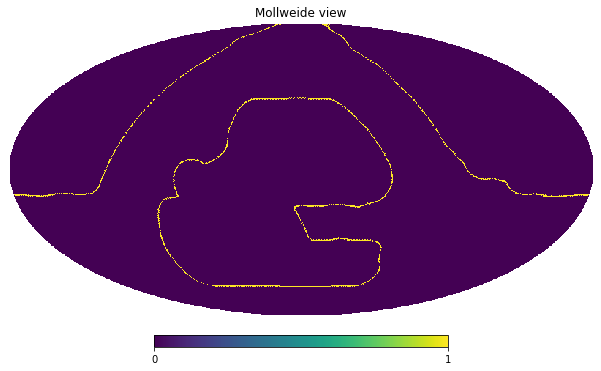

In [11]:
hp.mollview(Map)

In [12]:
hp.write_map('Legacy_footprint.fits', Map, overwrite=True)

With this map, I use a `matplotlib script` to obtain the image coordinates.